# 数据集

In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

data = pd.read_csv('xclara.csv')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


# 显示所有数据

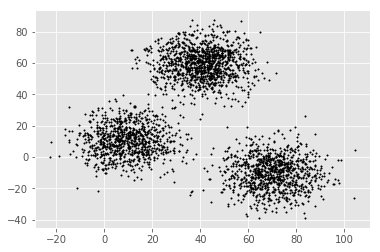

In [2]:
f1 = data['V1'].values
f2 = data['V2'].values

X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=2)

In [3]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# 随机选择 k个中心点

In [4]:
# 设定分区数
k = 3
# 随机获得中心点的X轴坐标
C_x = np.random.randint(0, np.max(X)-20, size=k)
# 随机获得中心点的Y轴坐标
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)

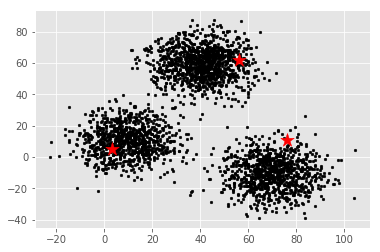

In [5]:
# 将初始化中心点画到输入的样例数据上
plt.scatter(f1, f2, c='black', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='red')

# K-Means中的核心迭代

In [6]:
# 用于保存中心点更新前的坐标
C_old = np.zeros(C.shape)
print(C)
# 用于保存数据所属中心点
clusters = np.zeros(len(X))
# 迭代标识位，通过计算新旧中心点的距离
iteration_flag = dist(C, C_old, 1)

tmp = 1
# 若中心点不再变化或循环次数不超过20次(此限制可取消)，则退出循环
while iteration_flag.any() != 0 and tmp < 20:
    # 循环计算出每个点对应的最近中心点
    for i in range(len(X)):
        # 计算出每个点与中心点的距离
        distances = dist(X[i], C, 1)
        # print(distances)
        # 记录0 - k-1个点中距离近的点
        cluster = np.argmin(distances) 
        # 记录每个样例点与哪个中心点距离最近
        clusters[i] = cluster
        
    # 采用深拷贝将当前的中心点保存下来
    # print("the distinct of clusters: ", set(clusters))
    C_old = deepcopy(C)
    # 从属于中心点放到一个数组中，然后按照列的方向取平均值
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        # print(points)
        # print(np.mean(points, axis=0))
        C[i] = np.mean(points, axis=0)
        # print(C[i])
    # print(C)
    
    # 计算新旧节点的距离
    print ('循环第%d次' % tmp)
    tmp = tmp + 1
    iteration_flag = dist(C, C_old, 1)
    print("新中心点与旧点的距离：", iteration_flag)

[[76. 11.]
 [56. 62.]
 [ 3.  5.]]
循环第1次
新中心点与旧点的距离： [21.82461   15.4554615  8.642282 ]
循环第2次
新中心点与旧点的距离： [0.16050768 0.06242954 0.14731456]
循环第3次
新中心点与旧点的距离： [0. 0. 0.]


# 最终结果图示

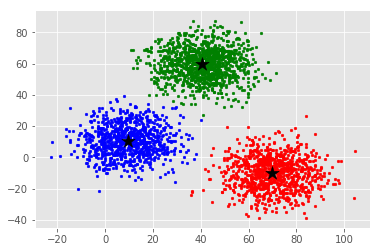

In [7]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
# 不同的子集使用不同的颜色
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='black')